In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import module
from module import *
import importlib
importlib.reload(module)
import readpng as rpng

In [2]:
img=rpng.get_img("./car.png")

In [3]:
np.shape(img)

(366, 408, 3)

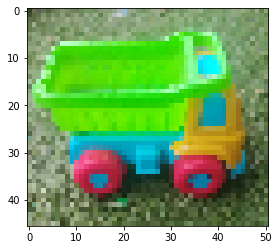

In [4]:
fig=plt.figure()

#timg=img[100:175,100:250]
#timg=img[100:175:2,100:250:2]
timg=img[::8,::8,:]
plt.imshow(timg)

In [5]:
Nx, Ny, Nc = np.shape(timg)
N_data = 100
rand_now = module.random_generator(N_data, Nx, Ny)
dRGB, g=rand_now.make_colordata(timg,20) 
g=np.array(g)

In [6]:
I_init=np.ones((Nx,Ny))
yR = mfista_func(I_init, dRGB[:,0], g, lambda_l1= 1e-6, lambda_tsv= 1e-3)
I_init=np.ones((Nx,Ny))
yG = mfista_func(I_init, dRGB[:,1], g, lambda_l1= 1e-6, lambda_tsv= 1e-3)
I_init=np.ones((Nx,Ny))
yB = mfista_func(I_init, dRGB[:,2], g, lambda_l1= 1e-6, lambda_tsv= 1e-3)

0.3164863586425781 0.6614282131195068 0.03210043907165527 SEC in total
3.804921865463257 7.933175325393677 0.391082763671875 SEC in total
3.9171013832092285 8.16008186340332 0.41460442543029785 SEC in total


In [13]:
y=np.array([yR.T,yG.T,yB.T]).T
np.shape(y)

(46, 51, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


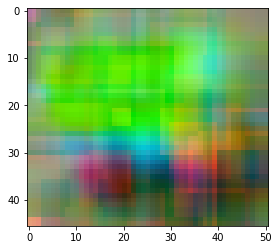

In [14]:
plt.imshow(y)

In [7]:
np.shape(timg)

(46, 51, 3)

In [8]:
ti=timg.reshape(46*51,3)

install colour package
pip install colour-science

In [9]:
import colour 
from colour.plotting import *
import itertools

In [10]:
#line = np.linspace(0.0, 1.0, 15, endpoint=True)
#rgb = np.array(list(itertools.product(line,line,line)), dtype=np.float)


In [22]:
np.shape(yi),np.shape(ti)
np.max(yi),np.max(ti)

(1.0056518629513604, 1.0)

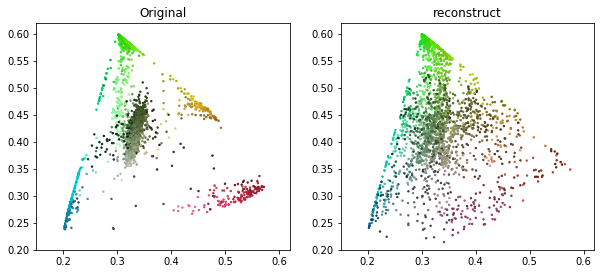

In [23]:
#XYZからxyへ変換
ti=timg.reshape(np.shape(timg)[0]*np.shape(timg)[1],3)
XYZ = colour.sRGB_to_XYZ(ti)
xy = colour.XYZ_to_xy(XYZ)

#CIE_1931_chromaticity_diagram_colours_plot(bounding_box=(-0.1, 0.9, -0.1, 0.9), standalone=False)
#plot_chromaticity_diagram_CIE1931(bounding_box=(0.15, 0.65, 0.15, 0.65), standalone=False)
#sRGB領域へプロット
#plt.plot(xy[:,0], xy[:,1], 'o', markersize=2, label="sRGB",color="gray",alpha=0.2)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=ti,alpha=1,s=2)
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("Original")
#plt.legend() 

yi=y.reshape(np.shape(y)[0]*np.shape(y)[1],3)
XYZ = colour.sRGB_to_XYZ(yi)
xy = colour.XYZ_to_xy(XYZ)
yi[yi>1]=1.0
yi[yi<0]=0


ax=fig.add_subplot(122,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=yi,alpha=1,s=2)
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("reconstruct")
display(standalone=True)